In [112]:
import numpy as np
import random
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator

In [149]:
# Number of qubts in the circuit
qubits = 3;

# Initialize circuit
circuit = QuantumCircuit(qubits,1)

# initializing string of integers
number_of_gates = 5
string_length = number_of_gates*3
integer_string = []

for i in range(string_length):
    
    if(i%3==0):
        integer_string.append(random.randrange(0,5))
    else:
        integer_string.append(random.randrange(0,3))
        
for i in range (0, int(string_length/3)):
    int_index = i*3
    
    if(integer_string[int_index]==0 and integer_string[int_index+1] == integer_string[int_index + 2]):
        if(integer_string[int_index+1]== 0):
            integer_string[int_index+1]=random.randrange(1,3)
        elif (integer_string[int_index+1]== 1):
            integer_string[int_index+2]=0 # TODO - hardcoded
        elif (integer_string[int_index+1]== 2):
            integer_string[int_index+2]=random.randrange(0,2)
            
print(integer_string)

[4, 1, 2, 2, 0, 0, 3, 1, 0, 2, 0, 1, 4, 1, 1]


In [150]:
# Parsing integer string and converting it to gates

# Test string
#gate_string = str(100021200120001)



# Needed variables
string_length = len(integer_string)
#gate_list = [int(x) for x in str(gate_string)] # converting from string to integer list

# Iterating
 # Test purpose
for i in range (0, int(string_length/3)):
    gate_index = i*3
    
    a=integer_string[gate_index]
    b=integer_string[gate_index+1]
    c=integer_string[gate_index+2]
    
    if (a==0):
        circuit.cx(b,c)
    elif (a==1):
        circuit.x(b)
    elif (a==2):
        circuit.h(b)
    elif (a==3):
        circuit.y(b)
    elif (a==4):
        circuit.z(b)
        
circuit.measure(0,0)

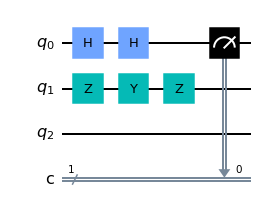

In [151]:
# Draw circuit
circuit.draw('mpl') # Remove 'mpl' if you don't have matplotlib installed (or install matplotlib)

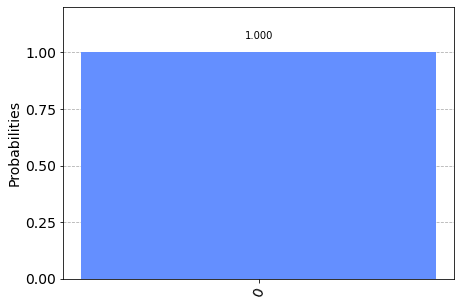

In [152]:
sim = AerSimulator()   # make new simulator object
job = sim.run(circuit) # run the experiment
result = job.result()  # get the results
counts =result.get_counts()    # interpret the results as a "counts" dictionary
plot_histogram(counts)